## Reading Training Data

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from mlxtend.plotting import plot_confusion_matrix

In [4]:
df = pd.read_csv('DataSet_HAR.csv')

In [5]:
df.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [6]:
df.shape

(10299, 563)

In [7]:
df.columns

Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X',
       ...
       'fBodyBodyGyroJerkMag-kurtosis()', 'angle(tBodyAccMean,gravity)',
       'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)', 'subject', 'Activity'],
      dtype='object', length=563)

In [8]:
df.groupby(['subject']).agg(np.sum).shape

(30, 561)

In [9]:
import random
random_indx = random.sample(range(1, 31), 30)

### 80% train, 20% test

In [10]:
0.8*len(random_indx)

24.0

In [11]:
train_ppl = random_indx[0:24]
len(train_ppl)

24

In [12]:
test_ppl = random_indx[24:]
len(test_ppl)

6

### Divide the Dataframe to train, test and dev

In [13]:
type(df['subject'].iloc[1])

numpy.int64

In [14]:
df_train = df[df['subject'].isin(train_ppl)]

In [15]:
df_test = df[df['subject'].isin(test_ppl)]

In [16]:
df_train = df_train.reset_index()
df_train= df_train.drop(['index', 'subject'], axis=1)
df_test = df_test.reset_index()
df_test= df_test.drop(['index', 'subject'], axis=1)

In [17]:
df_train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",Activity
0,0.236013,-0.026913,0.186395,-0.854112,-0.795111,-0.605794,-0.909125,-0.790751,-0.563723,-0.682518,...,-0.302844,-0.673707,0.076072,-0.489161,-0.254101,0.084231,-0.750788,0.268367,0.044542,STANDING
1,0.267318,-0.032355,-0.062924,-0.963742,-0.865102,-0.868472,-0.975781,-0.861588,-0.863451,-0.887808,...,-0.305393,-0.740185,-0.028610,-0.307088,-0.406407,0.628807,-0.742844,0.268968,-0.032272,STANDING
2,0.283352,-0.010729,-0.117333,-0.993056,-0.965022,-0.990440,-0.994083,-0.969828,-0.990788,-0.933323,...,0.012851,-0.317706,0.001529,0.292817,-0.142789,-0.426229,-0.727462,0.275749,-0.046136,STANDING
3,0.269277,-0.032607,-0.130287,-0.974128,-0.933411,-0.969966,-0.981722,-0.924646,-0.967740,-0.912315,...,0.228232,0.014969,0.018122,-0.450094,-0.298821,0.716132,-0.730111,0.275033,-0.042523,STANDING
4,0.278362,-0.013657,-0.129154,-0.961174,-0.837033,-0.943963,-0.967545,-0.843478,-0.942803,-0.882271,...,-0.265317,-0.692768,0.081535,-0.065885,-0.527001,0.696133,-0.724638,0.280739,-0.036736,STANDING


In [18]:
df_test_y = df_test[['Activity']]
df_test = df_test.drop(['Activity'], axis=1)

In [19]:
df_train_y = df_train[['Activity']]
df_train = df_train.drop(['Activity'], axis=1)

### Convert categorical data of Activity attribute to numerical

In [20]:
df_train_y = pd.get_dummies(df_train_y)
df_test_y = pd.get_dummies(df_test_y)

### Convert dataframes to numpy array

In [21]:
y_train = df_train_y.values
y_test = df_test_y.values

In [22]:
X_train = df_train.values
X_test = df_test.values

### Modeling

In [23]:
from keras import Sequential
from keras.layers import Dense
from sklearn.preprocessing import LabelEncoder

Using TensorFlow backend.


In [50]:
classifier = Sequential()
#First Hidden Layer
classifier.add(Dense(5, activation='relu', kernel_initializer='random_normal', input_dim=561))

In [51]:
#Output Layer
classifier.add(Dense(6, activation='softmax', kernel_initializer='random_normal'))

In [52]:
classifier.compile(optimizer ='adam',loss='categorical_crossentropy', metrics =['accuracy'])

In [53]:
# Fitting the data to the training dataset
classifier.fit(X_train,df_train_y, batch_size=10, epochs=100)

Epoch 1/100
8314/8314 [==============================] - 1s 120us/step - loss: 0.8556 - acc: 0.6191
Epoch 2/100
8314/8314 [==============================] - 1s 98us/step - loss: 0.2892 - acc: 0.8944
Epoch 3/100
8314/8314 [==============================] - 1s 98us/step - loss: 0.1821 - acc: 0.9328
Epoch 4/100
8314/8314 [==============================] - 1s 97us/step - loss: 0.1358 - acc: 0.9555
Epoch 5/100
8314/8314 [==============================] - 1s 97us/step - loss: 0.1091 - acc: 0.9613
Epoch 6/100
8314/8314 [==============================] - 1s 99us/step - loss: 0.0918 - acc: 0.9687
Epoch 7/100
8314/8314 [==============================] - 1s 99us/step - loss: 0.0846 - acc: 0.9685
Epoch 8/100
8314/8314 [==============================] - 1s 98us/step - loss: 0.0758 - acc: 0.9727
Epoch 9/100
8314/8314 [==============================] - 1s 97us/step - loss: 0.0731 - acc: 0.9729
Epoch 10/100
8314/8314 [==============================] - 1s 97us/step - loss: 0.0688 - acc: 0.9761
Epoch 11

In [41]:
eval_model=classifier.evaluate(X_train, df_train_y)
eval_model

8314/8314 [==============================] - 0s 19us/step


[0.06869381484348439, 0.9731777724320423]

In [42]:
y_pred=classifier.predict(X_test)

In [43]:
y_pred = (y_pred > 0.5)

In [44]:
y_pred.shape

(1985, 6)

In [45]:
df_test_y.shape

(1985, 6)

In [46]:
y_test = df_test_y.values
y_test.shape

(1985, 6)

In [47]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))

In [48]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9677581863979848

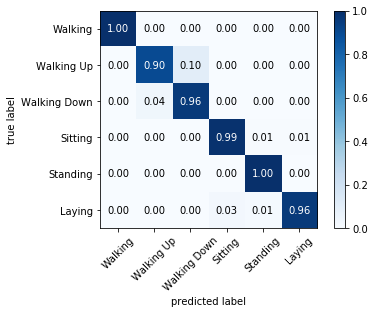

In [49]:
labels = ["Walking", "Walking Up", "Walking Down", "Sitting", "Standing", "Laying"]
fig, ax = plot_confusion_matrix(conf_mat=cm, colorbar=True, show_absolute=False, show_normed=True, class_names=labels)
plt.show()